In [1]:
import pandas as pd
from statsmodels.regression import linear_model
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("Data.xlsx")
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Data.xlsx'

In [5]:
# check if s is float
def isfloat(s):
    try:
        x = float(s)
        return True
    except ValueError:
        return False

# eliminate non-floats and nans from both columns
data1 = data[data["RATING"].map(lambda x : isfloat(x) and not math.isnan(x))]
data1 = data1[data1["Reviews"].map(lambda x : isfloat(x) and not math.isnan(x))]

In [6]:
# 1 if licenced 0 otherwise
data1["lic01"] = [1 if str(x) == "Licenced Electrician" else 0 for x in data1["LICENCE INFO "]]

# computed manualy Rating * Reviews column
data1["R*R"] = data1["RATING"] * data1["Reviews"]

# select X and y
X = data1[["RATING", "Reviews", "R*R"]].astype(float)
y = data1["lic01"]

In [7]:
model = linear_model.OLS(y, X).fit()

In [8]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  lic01   R-squared (uncentered):                   0.499
Model:                            OLS   Adj. R-squared (uncentered):              0.498
Method:                 Least Squares   F-statistic:                              509.1
Date:                Mon, 18 Oct 2021   Prob (F-statistic):                   1.49e-229
Time:                        12:20:49   Log-Likelihood:                         -1063.9
No. Observations:                1537   AIC:                                      2134.
Df Residuals:                    1534   BIC:                                      2150.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RATING         0.1057      0.003     38.899      0.000       0.100       0.111
Reviews        0.0008      0.002      0.369      0.712      -0.003       0.005
R*R           -0.0003      0.000     -0.609      0.543      -0.001       0.001
==============================================================================
Omnibus:                     5972.100   Durbin-Watson:                   0.140
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.643
Skew:                           0.036   Prob(JB):                     8.25e-51
Kurtosis:                       1.104   Cond. No.                         316.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since the p-value of the RATING is actually 0, we can reject the null hypothesis that the coefficient with RATING is 0. Hence, one can infer that licence is linearly related with the rating, i.e. that licenced workers are highly rated.

On the other hand, since p-values of the reviews and the product of reviews and RATING are higher, we accept the null hypothesis. This means that licence does not linearly depend on the number of provided Reviews.

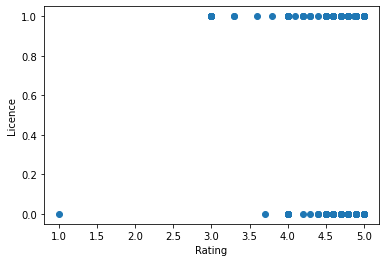

In [9]:
plt.scatter(X["RATING"], y)
plt.xlabel('Rating')
plt.ylabel('Licence')
plt.show()

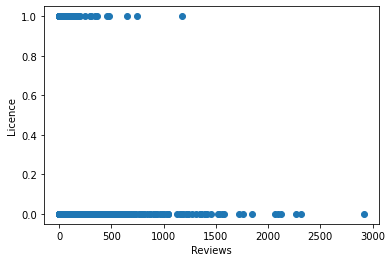

In [10]:
plt.scatter(X["Reviews"], y)
plt.xlabel('Reviews')
plt.ylabel('Licence')
plt.show()

Graphs are not showing much for RATINGS, since a lot of RATINGS are 5.0. However, one can conclude that the correlation is not strong. Similarly for Reviews, but clearly weaker than for RATINGS.

In [11]:
m0 = X[y == 0]["RATING"].mean()
s0 = X[y == 0]["RATING"].std()

m1 = X[y == 1]["RATING"].mean()
s1 = X[y == 1]["RATING"].std()

print(f"Mean and std of RATING for unlicenced workers are : {m0} and {s0}")
print(f"Mean and std of RATING for licenced workers are : {m1} and {s1}")

Mean and std of RATING for unlicenced workers are : 4.917073170731725 and 0.2223225599142654
Mean and std of RATING for licenced workers are : 4.859790794979078 and 0.3462522182314955


In [12]:
m0 = X[y == 0]["Reviews"].mean()
s0 = X[y == 0]["Reviews"].std()

m1 = X[y == 1]["Reviews"].mean()
s1 = X[y == 1]["Reviews"].std()

print(f"Mean and std of Reviews for unlicenced workers are : {m0} and {s0}")
print(f"Mean and std of Reviews for licenced workers are : {m1} and {s1}")

Mean and std of Reviews for unlicenced workers are : 173.84878048780487 and 342.72393238940117
Mean and std of Reviews for licenced workers are : 28.432357043235704 and 71.16408344655723


Again, one can conclude that RATING is slightly higher for licenced workers, than for unlicenced, while the number of reviews is more widely spreaded for unlicenced workers.